# Лабораторная работа 8

# Обход бинарного дерева поиска. Поиск максимального и минимального значений

Федоренко Алексей Жанович, 09.05.2025

# Задание 8.1. Центрированный обход бинарного дерева поиска


1. $\color{red}\text{Доопределите}$ классы `BinaryTree` , `BinaryNode` , `EmptyNode` из Лабораторной работы 7 за счет определения нового метода `lcr(self)` , реализующего центрированный обход бинарного дерева поиска.\
\
Результатом вызова метода `lcr` для экземпляра класса `BinaryTree` должен быть список значений вершин дерева, отсортированных по возрастанию.

In [1]:
class BinaryNode:   
    numberOfNodes = 0       
    def __init__(self, left, value, right): 
        self.left = left  
        self.value = value  
        self.right = right   
        BinaryNode.numberOfNodes += 1  
    def __repr__(self):  
        return f'({self.left}, {self.value}, {self.right})'  

    def insert(self, value): 
        if value < self.value: 
            self.left = self.left.insert(value)
        if value>=self.value: 
            self.right = self.right.insert(value)
        return self  
    def __contains__(self, value): 
        if value < self.value:  
            return value in self.left 
        elif value>self.value: 
            return value in self.right
        else:
            return True
    def __len__(self):   
        return self.numberOfNodes 
    def lcr(self):  # метод для обхода 
        result = self.left.lcr() + [self.value] + self.right.lcr()    
        return result # рекурсивный обход левого и правого поддерева и присоединение значения вершины

In [2]:
class EmptyNode:  
    def __repr__(self): 
        return '*'  

    def insert(self, value):  
        return BinaryNode(self, value, self) 
    def __contains__(self, value): 
        return False  
    def __len__(self): 
        return 0  
    def lcr(self):  # метод для обхода 
        return []  # для пустых вершин возвращаем пустой список

In [3]:
class BinaryTree:  
    def __init__(self):   
        self.root = EmptyNode()   
        BinaryNode.numberOfNodes = 0

    def __repr__(self):   
        return repr(self.root)   

    def insert(self, value):   
        self.root = self.root.insert(value) 
    def __contains__(self, value): 
        return value in self.root  
    def __len__(self):  
        return len(self.root)
    def lcr(self): # метод для обхода 
        return self.root.lcr()  # для корня возвращаем обход начиная с него

2. $\color{red}\text{Создайте}$ список `source_data` из случайных чисел, равномерно распределенных на отрезке .$\color{red}\text{Постройте}$ бинарное дерево поиска по списку случайных чисел и $\color{red}\text{выполните}$ центрированный обход дерева с помощью метода `lcr` .


In [4]:
import matplotlib.pyplot as plt
import random as rnd

source_data = [rnd.uniform(0,100) for i in range(10**3)]
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

sorted_data = tree.lcr()

3. $\color{red}\text{Изобразите}$ график по точкам, ординаты которых заданы списком `source_data` . В этой же графической области $\color{red}\text{изобразите}$ график по точкам, одинаты которых заданы списком, результатом центрированного обхода бинарного дерева поиска.

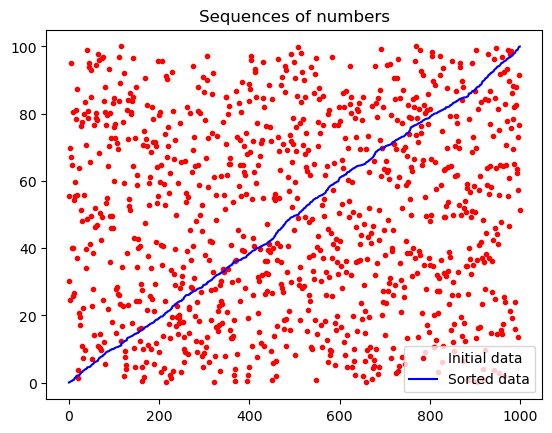

In [5]:
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,color='blue',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

## Задание 8.2. Нахождение минимального и максимального значения

$\color{red}\text{Доопределите или переопределите}$ классы `BinaryTree` , `BinaryNode` , `EmptyNode` за счет определения методов `min(self)` и `max(self)` для нахождения минимального и максимального значений в дереве, соответственно.

In [6]:
def min(self):
    return self.root.min()   #вызывает min для корневой вершины
BinaryTree.min=min

def min(self):
    return None   
EmptyNode.min=min

def min(self):
    if isinstance(self.left, EmptyNode):  # если дошли до конца слева
        return self.value   # ворзвращаем значение
    else: return self.left.min()   # если нет то рекурсивно идем дальше левее
BinaryNode.min=min

In [7]:
def max(self):
    return self.root.max()   #вызывает max для корневой вершины
BinaryTree.max=max

def min(self):
    return None   
EmptyNode.max=max

def max(self):
    if isinstance(self.right, EmptyNode):   # если дошли до конца справа
        return self.value    # ворзвращаем значение
    else: return self.right.max()    # если нет то рекурсивно идем дальше правее
BinaryNode.max=max

$\color{red}\text{Протестируйте}$ корректность выполнения методов `min` и `max` для дерева `tree` , созданного в Задании 8.1.

In [8]:
tree.min()

0.04367841492316504

In [9]:
tree.max()

99.9663181300522

## Задание 8.3. Создание модуля

$\color{red}\text{Напишите}$ строки документации для классов `BinaryTree` , `BinaryNode` , `EmptyNode` и для каждого метода классов.


In [10]:
class BinaryTree:  
    """
do: класс для реализации бинарного дерева поиска
    """
    def __init__(self):
        """
    do: создание пустого бинарного дерева
    returns: None
        """
        self.root = EmptyNode()   
        BinaryNode.numberOfNodes = 0

    def __repr__(self):   
        """
    do: строковое представление дерева (корня)
    returns: строка представления корня (корня)
        """
        return repr(self.root)   

    def insert(self, value):   
        """
    do: вставляет новое значение в корень (в дерево)
    arguments: value: значение для вставки
    returns: None
        """ 
        self.root = self.root.insert(value) 

    def __contains__(self, value):
        """
    do: проверяет наличие значения в корне (в дереве)
    arguments: value: значение для проверки
    returns: bool: True -- значение найдено, False -- не найдено
        """
        return value in self.root  

    def __len__(self):  
        """
    do: считает количество узлов в корне (в дереве)
    returns: количество элементов в корне (в дереве)
        """
        return len(self.root)

    def lcr(self):  
        """
    do: делает lcr обход корня
    returns: значения полученные при обходе
        """
        return self.root.lcr()  

    def min(self):
        """
    do: находит минимальное значение в дереве
    returns: возвращает минимальное значение
        """
        return self.root.min() 

    def max(self):
        """
    do: находит максимальное значение в дереве
    returns: возвращает максимальное значение
        """
        return self.root.max()

In [11]:
class EmptyNode:  
    """
do: класс для пустой вершины бинарного дерева
    """

    def __repr__(self):
        """
        do: возвращает строковое представление пустой вершины
        returns: строка '*'
        """
        return '*'  

    def insert(self, value):
        """
        do: вставляет значение вместо пустой вершины
        arguments: value -- значение для вставки
        returns: новый объект BinaryNode c вставленным значением
        """
        return BinaryNode(self, value, self) 

    def __contains__(self, value):
        """
        do: проверяет наличие значения в пустой вершине (всегда False)
        arguments: value -- значение для проверки
        returns: False
        """
        return False  

    def __len__(self):
        """
        do: возвращает количество узлов в пустой вершине (всегда 0)
        returns: 0
        """
        return 0  

    def lcr(self):
        """
        do: возвращает список значений при центрированном обходе пустой вершины
        returns: пустой список
        """
        return []  

    def min(self):
        """
        do: возвращает минимальное значение в пустой вершине
        returns: None
        """
        return None

    def max(self):
        """
        do: возвращает максимальное значение в пустой вершине
        returns: None
        """
        return None

In [12]:
class BinaryNode:   
    """
do: класс для непустого элемента бинарного дерева
attributes: numberOfNodes -- количество созданных непустых вершин (обнуляется при создании нового объекта)
    """
    numberOfNodes = 0       

    def __init__(self, left, value, right): 
        """
        do: конструктор узла с левым и правым поддеревом и значением
        arguments: left -- левое поддерево
                   value -- значение узла
                   right -- правое поддерево
        returns: None
        """
        self.left = left  
        self.value = value  
        self.right = right   
        BinaryNode.numberOfNodes += 1  

    def __repr__(self):  
        """
        do: строковое представление узла и поддеревьев
        returns: строка вида '(левое поддерево, значение, правое поддерево)'
        """
        return f'({self.left}, {self.value}, {self.right})'  

    def insert(self, value): 
        """
        do: вставляет значение в поддерево по правилу бинарного дерева
        arguments: value -- значение для вставки
        returns: обновлённый узел
        """
        if value < self.value: 
            self.left = self.left.insert(value)
        if value >= self.value: 
            self.right = self.right.insert(value)
        return self  

    def __contains__(self, value): 
        """
        do: рекурсивно проверяет наличие значения в поддереве.
        arguments: value -- значение для поиска
        returns: True если найдено, иначе False
        """
        if value < self.value:  
            return value in self.left 
        elif value > self.value: 
            return value in self.right
        else:
            return True

    def __len__(self):   
        """
        do: возвращает количество всех узлов в дереве (атрибут класса)
        returns: число узлов
        """
        return self.numberOfNodes 

    def lcr(self):   
        """
        do: рекурсивно делает lcr обход дерева
        returns: список значений в порядке лево-центр-право
        """
        result = self.left.lcr() + [self.value] + self.right.lcr()    
        return result 

    def min(self):
        """
        do: рекурсивно находит минимальное значение в дереве
        returns: минимальное значение
        """
        if isinstance(self.left, EmptyNode):  
            return self.value   
        else: 
            return self.left.min() 

    def max(self):
        """
        do: рекурсивно находит максимальное значение в дереве
        returns: максимальное значение
        """
        if isinstance(self.right, EmptyNode):   
            return self.value    
        else: 
            return self.right.max()

$\color{red}\text{Напишите}$ модуль `binaryTree.py` на основе созданных классов.

In [13]:
from binaryTree import BinaryTree

$\color{red}\text{Протестируйте}$  работу созданного модуля на примерах

In [14]:

tree = BinaryTree()
values = [15, 6, 23, 4, 7, 71, 5, 50]
print("вставляем значения:", values)
for v in values:
    tree.insert(v)
    print(tree)  
print('=================================================')
print("проверка наличия значений:")
test_values = [7, 10, 50, 100]
for v in test_values:
    print(f"{v} in tree? -> {v in tree}")
print('=================================================')
print("количество узлов в дереве:", len(tree))
print("центрированный обход (lcr):", tree.lcr())
print("минимальное значение в дереве:", tree.min())
print("максимальное значение в дереве:", tree.max())


вставляем значения: [15, 6, 23, 4, 7, 71, 5, 50]
(*, 15, *)
((*, 6, *), 15, *)
((*, 6, *), 15, (*, 23, *))
(((*, 4, *), 6, *), 15, (*, 23, *))
(((*, 4, *), 6, (*, 7, *)), 15, (*, 23, *))
(((*, 4, *), 6, (*, 7, *)), 15, (*, 23, (*, 71, *)))
(((*, 4, (*, 5, *)), 6, (*, 7, *)), 15, (*, 23, (*, 71, *)))
(((*, 4, (*, 5, *)), 6, (*, 7, *)), 15, (*, 23, ((*, 50, *), 71, *)))
проверка наличия значений:
7 in tree? -> True
10 in tree? -> False
50 in tree? -> True
100 in tree? -> False
количество узлов в дереве: 8
центрированный обход (lcr): [4, 5, 6, 7, 15, 23, 50, 71]
минимальное значение в дереве: 4
максимальное значение в дереве: 71


In [15]:
more = [3, 8, 70]
print("добавляем ещё значения:", more)
for v in more:
    tree.insert(v)

print("дерево после добавления новых значений:")
print(tree)
print('=================================================')
print("центрированный обход (lcr):", tree.lcr())
print("минимальное значение:", tree.min())
print("максимальное значение:", tree.max())
print("количество узлов:", len(tree))

добавляем ещё значения: [3, 8, 70]
дерево после добавления новых значений:
((((*, 3, *), 4, (*, 5, *)), 6, (*, 7, (*, 8, *))), 15, (*, 23, ((*, 50, (*, 70, *)), 71, *)))
центрированный обход (lcr): [3, 4, 5, 6, 7, 8, 15, 23, 50, 70, 71]
минимальное значение: 3
максимальное значение: 71
количество узлов: 11


In [16]:

tree1 = BinaryTree()
print("пустое дерево:", tree1)
print("lcr пустого дерева:", tree1.lcr())
print("min пустого дерева:", tree1.min())
print("max пустого дерева:", tree1.max())
print("len пустого дерева:", len(tree1))

пустое дерево: *
lcr пустого дерева: []
min пустого дерева: None
max пустого дерева: None
len пустого дерева: 0


In [17]:
def quick_sort(lst):                           # быстрая сортировка
    if len(lst) <2:
        return lst
    
    pork = sorted([lst[0],lst[-1],lst[len(lst)//2]])[1]
    les = [x for x in lst if x < pork]
    greq = [x for x in lst if x > pork]
    eq=[x for x in lst if x==pork]
    lst= quick_sort(les) + eq + quick_sort(greq)
    return lst

In [18]:
with open('numbers.txt','r') as f:
    data=[int(x) for x in f.read().split(',')]
print(len(data))

500000


In [19]:
import time

s1=time.perf_counter()
sorted1=quick_sort(data)
e1=time.perf_counter()

s2=time.perf_counter()
tree_sort=BinaryTree()
for x in data:
    tree_sort.insert(x)
sorted2=tree_sort.lcr()
e2=time.perf_counter()

print(f'time for quick sort is {e1-s1}\ntime for binary tree lcd is {e2-s2}\nare sorted lists equal: {sorted1==sorted2}')

time for quick sort is 1.1204549000030966
time for binary tree lcd is 3.5630153000020073
are sorted lists equal: True


In [20]:
print(len(tree_sort))

500000


## Задание 8.4 Примеры пользовательских классов

$\color{red}\text{Опредилите}$ три пользовательских класса с использованием возможностей ООП,
представленных в лекции к теме "Проектирование классов", например, классовые,
статические, абстрактные методы, атрибуты-свойства, шаблон синглтон и др.

$\color{red}\text{Продемонстрируйте}$ на примерах работу трех пользовательских классов.

In [ ]:
class Date():
 def __init__(self, day, month, year):
    self.day = day
    self.month = month
    self.year = year

 @classmethod
 def now(cls):
    t = time.localtime()
    return cls(t.tm_mday, t.tm_mon, t.tm_year)

 def __repr__(self):
    return f'{self.day}.{self.month}.{self.year}' 

In [22]:
date1 = Date(day=10,month=11,year=2012); date2 = Date.now()
date1, date2

(10.11.2012, 15.5.2025)

In [23]:
import math
class Class1:
 def __init__(self):
    self._x = None

 @property # с методом можно будет работать, как с атрибутом
 def x_squared(self):
    """squared value of class attribute"""
    return None if self._x is None else self._x**2
 @x_squared.setter
 def x_squared(self, value):
    self._x = math.sqrt(value)

 @x_squared.deleter
 def x_squared(self):
    print('NotImplemented')

In [24]:
i = Class1()
print(i.x_squared)
i.x_squared = 25
print(i._x)
del i.x_squared

None
5.0
NotImplemented


In [25]:
class Singleton:
 instance = None
 def __new__(cls, *args, **kwarg):
    if cls.instance is None:
        cls.instance = super().__new__(cls)
    return cls.instance

In [26]:
class Single(Singleton):
 def __init__(self, val1, val2):
    self.attr1 = val1
    self.attr2 = val2

In [27]:
i1 = Single(2, 3); i2 = Single(3, 4)
i1.__dict__, i2.__dict__


({'attr1': 3, 'attr2': 4}, {'attr1': 3, 'attr2': 4})